**Model Training**

**Import Data and Required Packages**

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

**Kaggle Dataset**
* [Student Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)


**Import the CSV Data using Pandas DataFrame**

In [36]:
df = pd.read_csv('Student.csv')

In [37]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Show Top 5 Records**

In [38]:
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
df.tail()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


**Preparing 'X' and 'Y' variables**


1.   Preparing 'X' Varibale



In [40]:
X = df.drop(columns=['math_score'],axis=1)

In [41]:
X.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [42]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental education' variable:",end=" " )
print(df['parental_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


2. Preparing 'Y' Variable

In [43]:
y = df['math_score']

In [44]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [45]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [46]:
X = preprocessor.fit_transform(X)

In [47]:
X.shape

(1000, 19)

In [48]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

**Create an Evaluate Function to give all metrics after model Training**

In [49]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*45)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3293
- Mean Absolute Error: 4.2715
- R2 Score: 0.8740
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4252
- Mean Absolute Error: 4.2222
- R2 Score: 0.8790


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2986
- Mean Absolute Error: 1.8302
- R2 Score: 0.9766
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0610
- Mean Absolute Error: 4.7118
- R2 Score: 0.8490




**Displaying Results**

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.880593
0,Linear Regression,0.879046
2,Random Forest Regressor,0.849032


**Linear Regression Model**

In [52]:
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)
linear_y_predict = linear_model.predict(X_test)
score = r2_score(y_test, linear_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.90


**Scatter Plot of linear_y_pred (Predicted Value) and y_test (Actual Value) in Linear Regression**

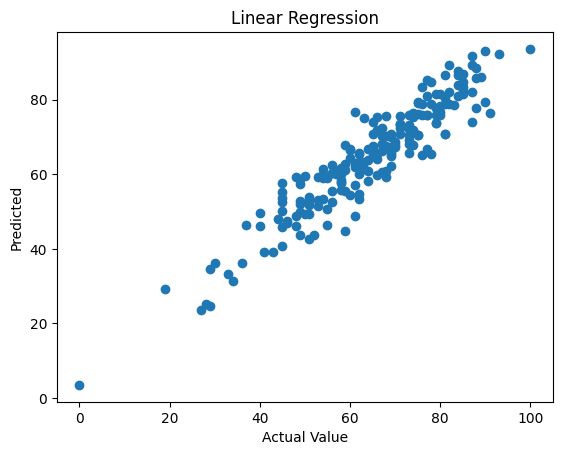

In [53]:
plt.scatter(y_test, linear_y_predict);
plt.title("Linear Regression")
plt.xlabel('Actual Value');
plt.ylabel('Predicted');

In [54]:
# from google.colab import drive
# drive.mount('/content/drive')

**Regression Plot For Linear Regression**

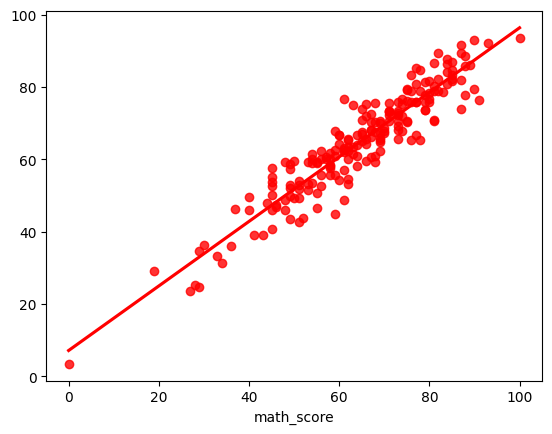

In [55]:
sns.regplot(x=y_test,y=linear_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Linear Regression**

In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':linear_y_predict,'Difference':y_test-linear_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000


**Ridge Regression**

In [57]:
ridge_model = Ridge()
ridge_model = ridge_model.fit(X_train, y_train)
ridge_y_predict = ridge_model.predict(X_test)
score = r2_score(y_test, ridge_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


**Plot ridge_y_pred (Predicted Value) and y_test (Actual Value) in Ridge Regression**

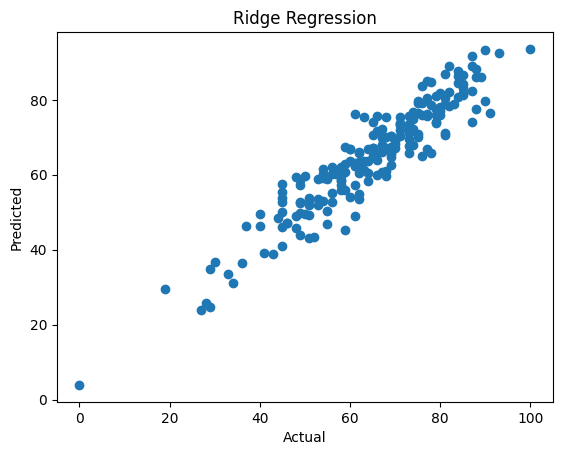

In [58]:
plt.scatter(y_test,ridge_y_predict);
plt.title("Ridge Regression")
plt.xlabel('Actual');
plt.ylabel('Predicted');

**Regression Plot For Ridge Regression**

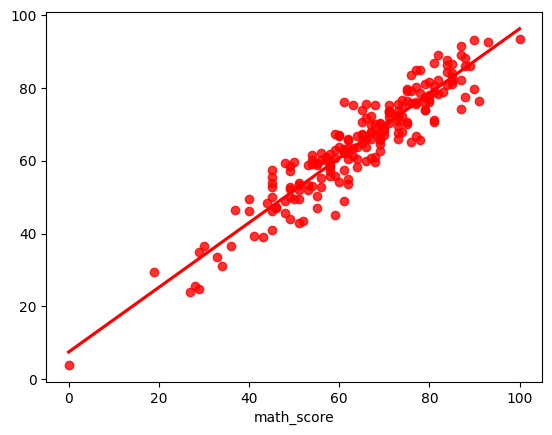

In [59]:
sns.regplot(x=y_test,y=ridge_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Ridge Regression**

In [60]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ridge_y_predict,'Difference':y_test-ridge_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


**Random Forest**

In [61]:
random_forest_model = RandomForestRegressor()
random_forest_model = random_forest_model.fit(X_train, y_train)
random_y_predict = random_forest_model.predict(X_test)
score = r2_score(y_test, random_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.75


**Plot random_y_pred (Predicted Value) and y_test (Actual Value) in Random Forest**

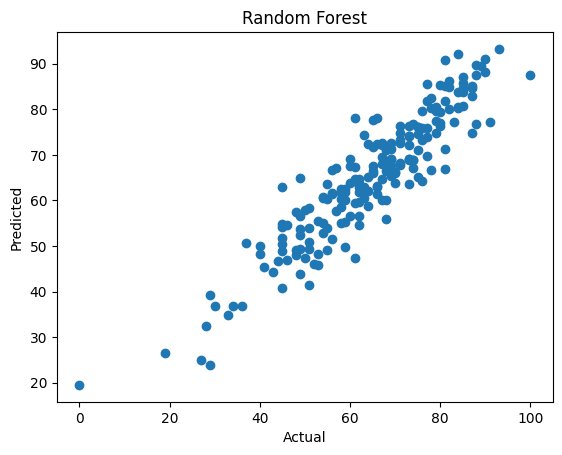

In [62]:
plt.scatter(y_test,random_y_predict);
plt.title("Random Forest")
plt.xlabel('Actual');
plt.ylabel('Predicted');

**Regression Plot For Random Forest**

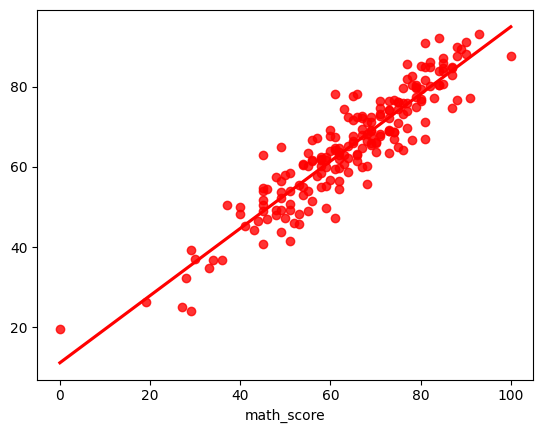

In [63]:
sns.regplot(x=y_test,y=random_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Random Forest**

In [64]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':random_y_predict,'Difference':y_test-random_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.17,13.83
737,53,55.59,-2.59
740,80,76.96,3.04
660,74,76.69,-2.69
411,84,80.45,3.55
...,...,...,...
408,52,46.13,5.87
332,62,59.74,2.26
208,74,67.05,6.95
613,65,67.65,-2.65


**Comparison**

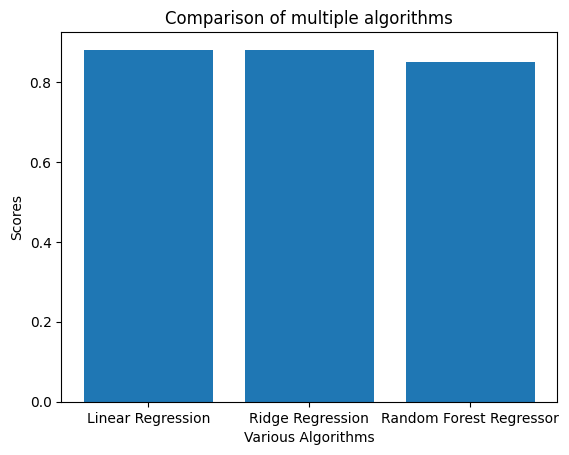

In [65]:
plt.bar(model_list, r2_list)
plt.xlabel("Various Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()